# Performance of BinaryConnect

In [22]:
% matplotlib inline

import os
import matplotlib.pyplot as plt

from tests.other.googlenet.util import ExpResults

## Parameters and definitions

In [24]:
log_dir = '/home/rbodo/.snntoolbox/data/cifar10/binaryconnect/log/gui'
runlabel_fp = log_dir + '/01'
path_fp = os.path.join(log_dir, runlabel_fp)
runlabel_binarized = log_dir + '/02'
path_binarized = os.path.join(log_dir, runlabel_binarized)

scale = 1e3  # Scale from MOps to GOps

In [25]:
exp_fp = ExpResults(path_fp, 'full-precision', '.', scale=scale)
exp_binarized = ExpResults(path_binarized, 'binarized', '.', 'green', scale=scale)
experiments = [exp_fp, exp_binarized]

## Plot error vs operations

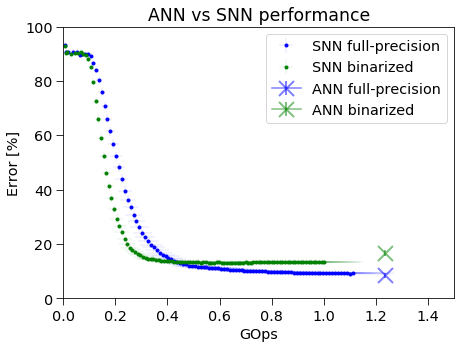

In [26]:
show_numbers = False

plt.figure(figsize=(7, 5))

for exp in experiments:
    plt.errorbar(exp.mean_computations_t, exp.e1_mean, xerr=exp.std_computations_t,
                 yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)

exp = experiments[0]
plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN '+exp.label, color=exp.color1, markersize=15,
             yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)
if show_numbers:
    plt.annotate('({:.2f}, {:.2f})'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.15, exp.e1_ann + 10), color=exp.color1)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.op1_optimal, exp.e1_optimal), xy=(exp.op1_optimal, exp.e1_optimal),
                 xytext=(exp.op1_optimal, exp.e1_optimal + 10),
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

exp = experiments[1]
plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN '+exp.label, color=exp.color1, markersize=15,
             yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)
if show_numbers:
    plt.annotate('({:.2f}, {:.2f})'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.15, exp.e1_ann + 10), color=exp.color1)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.op1_optimal, exp.e1_optimal), xy=(exp.op1_optimal, exp.e1_optimal),
                 xytext=(exp.op1_optimal, exp.e1_optimal + 10),
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

plt.xlim(0, 1.5)
plt.ylim(0, 100)
plt.ylabel('Error [%]')
plt.xlabel('GOps')
plt.legend(loc='upper right')
plt.title('ANN vs SNN performance')
plt.savefig(os.path.join(log_dir, 'err_vs_ops'), bbox_inches='tight')

In [14]:
for exp in experiments:
    print('SNN {}: ({:.2f} GOps/frame, {:.2f} %)'.format(exp.label, exp.op1_optimal, exp.e1_optimal))
    print('SNN {}: ({:.2f} GOps/frame, {:.2f} %)'.format(exp.label, exp.op1_0, exp.e1_0))
    print('SNN {}: ({:.2f} GOps/frame, {:.2f} %)'.format(exp.label, exp.op1_1, exp.e1_1))
    print('ANN {}: ({:.2f} GOps/frame, {:.2f} %)'.format(exp.label, exp.operations_ann, exp.e1_ann))

SNN full-precision: (0.33 GOps/frame, 20.59 %)
SNN full-precision: (1.10 GOps/frame, 8.86 %)
SNN full-precision: (0.74 GOps/frame, 9.86 %)
ANN full-precision: (1.23 GOps/frame, 8.51 %)
SNN binarized: (0.25 GOps/frame, 19.29 %)
SNN binarized: (0.63 GOps/frame, 13.18 %)
SNN binarized: (0.36 GOps/frame, 14.18 %)
ANN binarized: (1.23 GOps/frame, 16.78 %)
